### Active data on authorized SNAP retailers - This data is current as of Dec. 31, 2024

SNAP retailers are small and large businesses authorized by the U.S. Department of Agriculture (USDA) to accept Supplemental Nutrition Assistance Program (SNAP) benefits for eligible food purchases

---

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import folium

In [13]:
snap = pd.read_csv("../local-data/SNAP_Retailer_Location_data.csv", encoding='latin-1')
snap = snap.drop(columns=['ï»¿X', 'Y'])
dallas_snap = snap[(snap['County'] == 'DALLAS') & (snap['State'] == 'TX')]
dallas_snap.columns = dallas_snap.columns.str.upper().str.replace(' ', '_')
display(dallas_snap.columns)
display(len(dallas_snap))
display(dallas_snap.head())
display(dallas_snap.STORE_TYPE.unique())

Index(['RECORD_ID', 'STORE_NAME', 'STORE_STREET_ADDRESS', 'ADDITONAL_ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'ZIP4', 'COUNTY', 'STORE_TYPE', 'LATITUDE',
       'LONGITUDE', 'INCENTIVE_PROGRAM', 'GRANTEE_NAME', 'OBJECTID'],
      dtype='object')

1778

,RECORD_ID,STORE_NAME,STORE_STREET_ADDRESS,ADDITONAL_ADDRESS,CITY,STATE,ZIP_CODE,ZIP4,COUNTY,STORE_TYPE,LATITUDE,LONGITUDE,INCENTIVE_PROGRAM,GRANTEE_NAME,OBJECTID
32,1397961,7-eleven Convenience Store 32914B,6122 Broadway Blvd,NaN,Garland,TX,75043,5826,DALLAS,Convenience Store,32.841278,-96.594841,NaN,NaN,33
216,1627853,Grand Trip,7500 S Westmoreland Rd,NaN,Dallas,TX,75237,3306,DALLAS,Convenience Store,32.654293,-96.885239,NaN,NaN,217
217,1618795,Corner Market,500 S Hampton Rd,NaN,Dallas,TX,75208,5621,DALLAS,Convenience Store,32.741020,-96.856522,NaN,NaN,218
278,1634103,Joe V's Smart Shop 805,7700 Samuell Blvd,NaN,Dallas,TX,75227,,DALLAS,Supermarket,32.792328,-96.685730,NaN,NaN,279
279,1618256,WB Ferguson Shell,10290 Ferguson Rd,NaN,Dallas,TX,75228,3013,DALLAS,Convenience Store,32.834496,-96.673080,NaN,NaN,280


array(['Convenience Store', 'Supermarket', 'Other', 'Grocery Store',
       'Super Store', 'Farmers and Markets', 'Specialty Store'],
      dtype=object)

In [15]:
for col in dallas_snap.columns:
    print(f"{col}: {dallas_snap[col].isna().sum()} NaN values")

print(f'{len(dallas_snap)} rows of data' )

RECORD_ID: 0 NaN values
STORE_NAME: 0 NaN values
STORE_STREET_ADDRESS: 0 NaN values
ADDITONAL_ADDRESS: 1473 NaN values
CITY: 0 NaN values
STATE: 0 NaN values
ZIP_CODE: 0 NaN values
ZIP4: 0 NaN values
COUNTY: 0 NaN values
STORE_TYPE: 0 NaN values
LATITUDE: 0 NaN values
LONGITUDE: 0 NaN values
INCENTIVE_PROGRAM: 1777 NaN values
GRANTEE_NAME: 1778 NaN values
OBJECTID: 0 NaN values
1778 rows of data


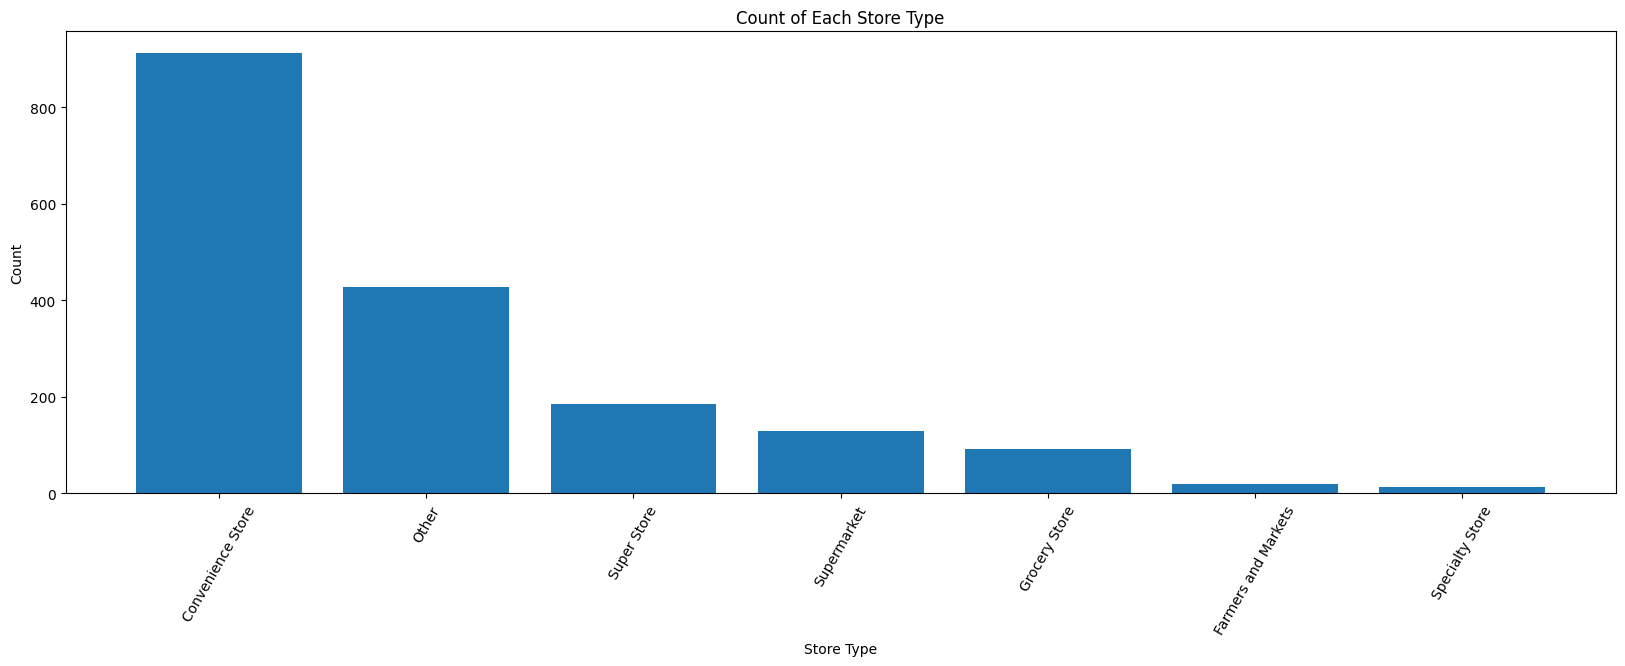

In [16]:
STORE_COUNTS = dallas_snap.STORE_TYPE.value_counts()

plt.figure(figsize=(20, 6))
plt.bar(STORE_COUNTS.index, STORE_COUNTS.values,align='center')
plt.title('Count of Each Store Type')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.show()

In [23]:
active_map = folium.Map(location=[32.7767, -96.7970], zoom_start=10)
store_types = dallas_snap['STORE_TYPE'].unique()

store_type_colors = {
    'Convenience Store': 'red',
    'Supermarket': 'blue', 
    'Other': 'green',
    'Grocery Store': 'purple',
    'Super Store': 'orange',
    'Farmers and Markets': 'gray',
    'Specialty Store': 'pink'
}

feature_groups = {}
for store_type in store_types:
    feature_groups[store_type] = folium.FeatureGroup(name=store_type)

for idx, row in dallas_snap.iterrows():
    if pd.notna(row['LATITUDE']) and pd.notna(row['LONGITUDE']):
        store_type = row['STORE_TYPE']
        popup_text = f"<b>{row['STORE_NAME']}</b><br>Type: {store_type}"
        
        folium.Marker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            popup=folium.Popup(popup_text, max_width=300),
            icon=folium.Icon(color=store_type_colors[store_type], icon='info-sign')
        ).add_to(feature_groups[store_type])

for fg in feature_groups.values():
    fg.add_to(active_map)

folium.LayerControl().add_to(active_map)

active_map